<a href="https://colab.research.google.com/github/jun-wei-lin/NCHU/blob/main/AIoT-DA/HW5%3DDeep%20Lerarning%20basic/Hw5_1_iris_classification_problem_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# CRISP-DM Implementation for Iris Classification using TensorFlow/Keras

# Step 1: Business Understanding
# The goal is to classify iris flowers into three species (Setosa, Versicolor, Virginica)
# based on sepal and petal length and width.

# Step 2: Data Understanding
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Convert to DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y
print(iris_df.head())

# Step 3: Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.utils import to_categorical

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 4: Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a simple neural network model
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Evaluation
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 6: Deployment
# Save the model for future use
model.save('iris_classifier_model.h5')

# Predict on new data
sample_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example input
sample_data_scaled = scaler.transform(sample_data)
prediction = model.predict(sample_data_scaled)
class_index = np.argmax(prediction)
species = iris.target_names[class_index]
print(f"Predicted Species: {species}")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5493 - loss: 1.0852 - val_accuracy: 0.5667 - val_loss: 1.0957
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4699 - loss: 1.0925 - val_accuracy: 0.6333 - val_loss: 1.0159
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5211 - loss: 0.9872 - val_accuracy: 0.7333 - val_loss: 0.9355
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5326 - loss: 0.9553 - val_accuracy: 0.7667 - val_loss: 0.8732
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5525 - loss: 0.9249 - val_accuracy: 0.9000 - val_loss: 0.8090
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5939 - loss: 0.8883 - val_accuracy: 0.8333 - val_loss: 0.7527
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7151 - loss: 0.7329 - val_accuracy: 0.8333 - val_loss: 0.6871
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7562 - loss: 0.7226 - val_accuracy: 0.8333 - val_loss: 0.6317
Ep

Test Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted Species: setosa


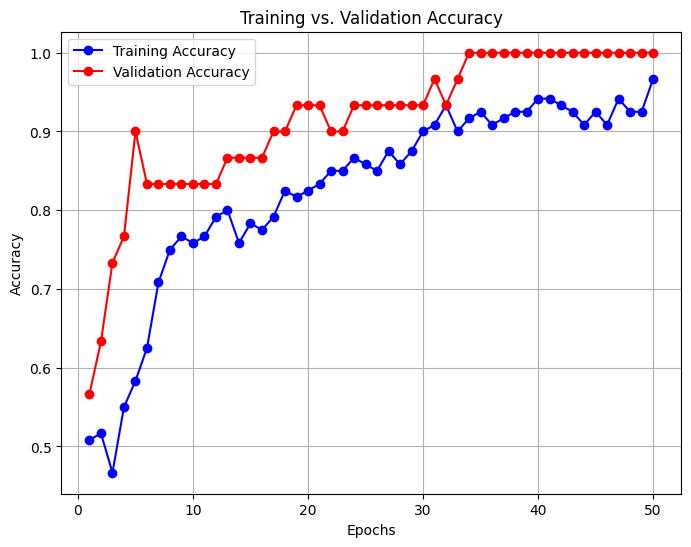

In [ ]:
# 從 history 物件提取訓練和驗證的準確率
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# 繪製準確率比較圖
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


修改優化後

In [ ]:
# CRISP-DM Implementation for Iris Classification using TensorFlow/Keras

# Step 1: Business Understanding
# The goal is to classify iris flowers into three species (Setosa, Versicolor, Virginica)
# based on sepal and petal length and width.

# Step 2: Data Understanding
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Convert to DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y
print(iris_df.head())

# Step 3: Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.utils import to_categorical

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 4: Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    if epoch > 30:
        return lr * 0.5
    return lr

# Build a neural network model with dropout, batch normalization, and callbacks
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    LearningRateScheduler(lr_schedule)
]

# Step 5: Evaluation
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    verbose=1,
    callbacks=callbacks
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 6: Deployment
# Save the model for future use
model.save('iris_classifier_model.h5')

# Predict on new data
sample_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example input
sample_data_scaled = scaler.transform(sample_data)
prediction = model.predict(sample_data_scaled)
class_index = np.argmax(prediction)
species = iris.target_names[class_index]
print(f"Predicted Species: {species}")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2872 - loss: 1.6368 - val_accuracy: 0.3000 - val_loss: 1.1917 - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2197 - loss: 1.8732 - val_accuracy: 0.3333 - val_loss: 1.1588 - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2514 - loss: 1.6007 - val_accuracy: 0.3333 - val_loss: 1.1198 - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3527 - loss: 1.2492 - val_accuracy: 0.3667 - val_loss: 1.0737 - learning_rate: 0.0010
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4484 - loss: 1.0108 - val_accuracy: 0.5000 - val_loss: 1.0158 - learning_rate: 0.0010
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4352 - loss: 1.1342 - val_accuracy: 0.6000 - val_loss: 0.9558 - learning_rate: 0.0010
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4987 - loss: 1.0583 - val_accuracy: 0.6667 - v

Test Accuracy: 96.67%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Predicted Species: setosa


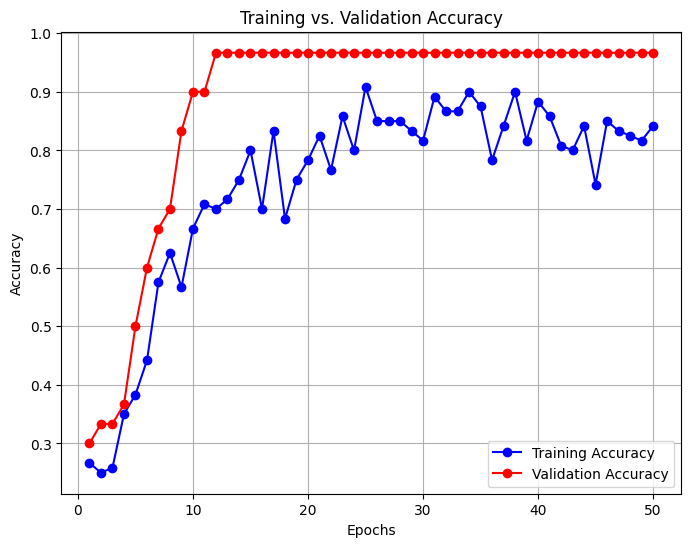

In [ ]:
# 從 history 物件提取訓練和驗證的準確率
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# 繪製準確率比較圖
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
